# Домашнее задание 5

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_5

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица с $L =1000$, $\mu = 1$, $d = 100$, $b$ - так же случайный вектор.

__(а)__ Для такой задачи симулируем итерацию SGD:
$$
x^{k+1} = x^k - \gamma (\nabla f(x^k) + \xi^k),
$$
где $\xi^k$ - независимая от $x^k$ случайная величина из нормального распределения $\mathcal{N}(0, 100)$.

Для такого метода с $\gamma = \frac{1}{L}$ постройте график сходимости (критерий $\| \nabla f(x^k)\|^2$). Постройте на этом же графике сходимость честного градиентного спуска c $\gamma = \frac{1}{L}$. Сделайте вывод о характере сходимости нового метода.

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

from sklearn.datasets import load_svmlight_file

from importlib import reload
import HW_5
reload(HW_5)
from HW_5 import MyLinearRegression

In [146]:
#@title Генерация матрицы
#ответ
def generate_matrix(d, mu, L):
    """
    Функция генерации симметричной квадратной матрицы(d, d),
    с минимальным собственным числом mu, и нормой матрицы L.

    Inputs:
    - d     : размер матрицы 
    - mu    : минимальное собственное число в матрице
    - L     : норма матрицы    
    
    Returns:
    Сгенерированную матрицу.
    """
    tmp = np.random.rand(d, d)  # генерим случайную матрицу
    tmp = tmp + tmp.T           # делаем её симметричной
    u, s, vh = la.svd(tmp)      # раскладываем по svd
    
    s = s - np.amin(s) + mu     # вычитаем минимальный элемент и прибавляем желаемое значение mu
    s[0] = L

    D = np.diag(s)
    A = u.T @ D @ u

    return A

def draw_error_time(model):
    _, ax = plt.subplots(1, 2, figsize=(21, 7))
    step = model.get_step()
    
    y = np.array(model.get_errors())
    x = np.linspace(step, step * len(y), len(y))

    ax[0].set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
    ax[0].plot(x, np.log(y), label=model.get_name())

    ax[0].set_xlabel("Номер итерации")
    ax[0].set_ylabel("Логарифм ошибки")

    x = np.array(model.get_time())

    ax[1].set_title("Логарифм ошибки от времени ($error = || \\nabla f(w) ||$)")
    ax[1].plot(x, np.log(y), label=model.get_name())

    ax[1].set_xlabel("Время, с")
    ax[1].set_ylabel("Логарифм ошибки")
    
    legend_box = ax[1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

def func_draw_error_time(model_A, model_B):
    _, ax = plt.subplots(1, 2, figsize=(21, 7))
    step_A = model_A.get_step()
    step_B = model_B.get_step()

    ax[0].set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
    ax[0].set_xlabel("Номер итерации")
    ax[0].set_ylabel("Логарифм ошибки")
    
    ax[1].set_title("Логарифм ошибки от времени ($error = || \\nabla f(w) ||$)")
    ax[1].set_xlabel("Время, с")
    ax[1].set_ylabel("Логарифм ошибки")
    
    
    y = np.array(model_A.get_errors())
    x = np.linspace(step_A, step_A * len(y), len(y))
    ax[0].plot(x, np.log(y), label=model_A.get_name())
    x = np.array(model_A.get_time())
    ax[1].plot(x, np.log(y), label=model_A.get_name())

    y = np.array(model_B.get_errors())
    x = np.linspace(step_B, step_B * len(y), len(y))
    ax[0].plot(x, np.log(y), label = model_B.get_name())
    x = np.array(model_B.get_time())
    ax[1].plot(x, np.log(y), label=model_B.get_name())

    legend_box = ax[1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

def plot_3_models(model_A, model_B, model_C):
    _, ax = plt.subplots(1, 2, figsize=(21, 7))
    step_A = model_A.get_step()
    step_B = model_B.get_step()
    step_C = model_C.get_step()

    ax[0].set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
    ax[0].set_xlabel("Номер итерации")
    ax[0].set_ylabel("Логарифм ошибки")
    
    ax[1].set_title("Логарифм ошибки от времени ($error = || \\nabla f(w) ||$)")
    ax[1].set_xlabel("Время, с")
    ax[1].set_ylabel("Логарифм ошибки")
    
    
    y = np.array(model_A.get_errors())
    x = np.linspace(step_A, step_A * len(y), len(y))
    ax[0].plot(x, np.log(y), label=model_A.get_name())
    x = np.array(model_A.get_time())
    ax[1].plot(x, np.log(y), label=model_A.get_name())

    y = np.array(model_B.get_errors())
    x = np.linspace(step_B, step_B * len(y), len(y))
    ax[0].plot(x, np.log(y), label = model_B.get_name())
    x = np.array(model_B.get_time())
    ax[1].plot(x, np.log(y), label=model_B.get_name())

    y = np.array(model_C.get_errors())
    x = np.linspace(step_C, step_C * len(y), len(y))
    ax[0].plot(x, np.log(y), label = model_C.get_name())
    x = np.array(model_C.get_time())
    ax[1].plot(x, np.log(y), label=model_C.get_name())

    legend_box = ax[1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")


In [147]:
# Параметры задачи минимизации
d = 100
mu = 1
L = 1000
b = np.random.randn(d)
A = generate_matrix(d, mu, L)

In [148]:
# Обучение моделей
model_st = MyLinearRegression(stochastic=True, name="SGD")
model_st.fit(A, b)

model_dt = MyLinearRegression(stochastic=False, name="GD")
model_dt.fit(A, b)

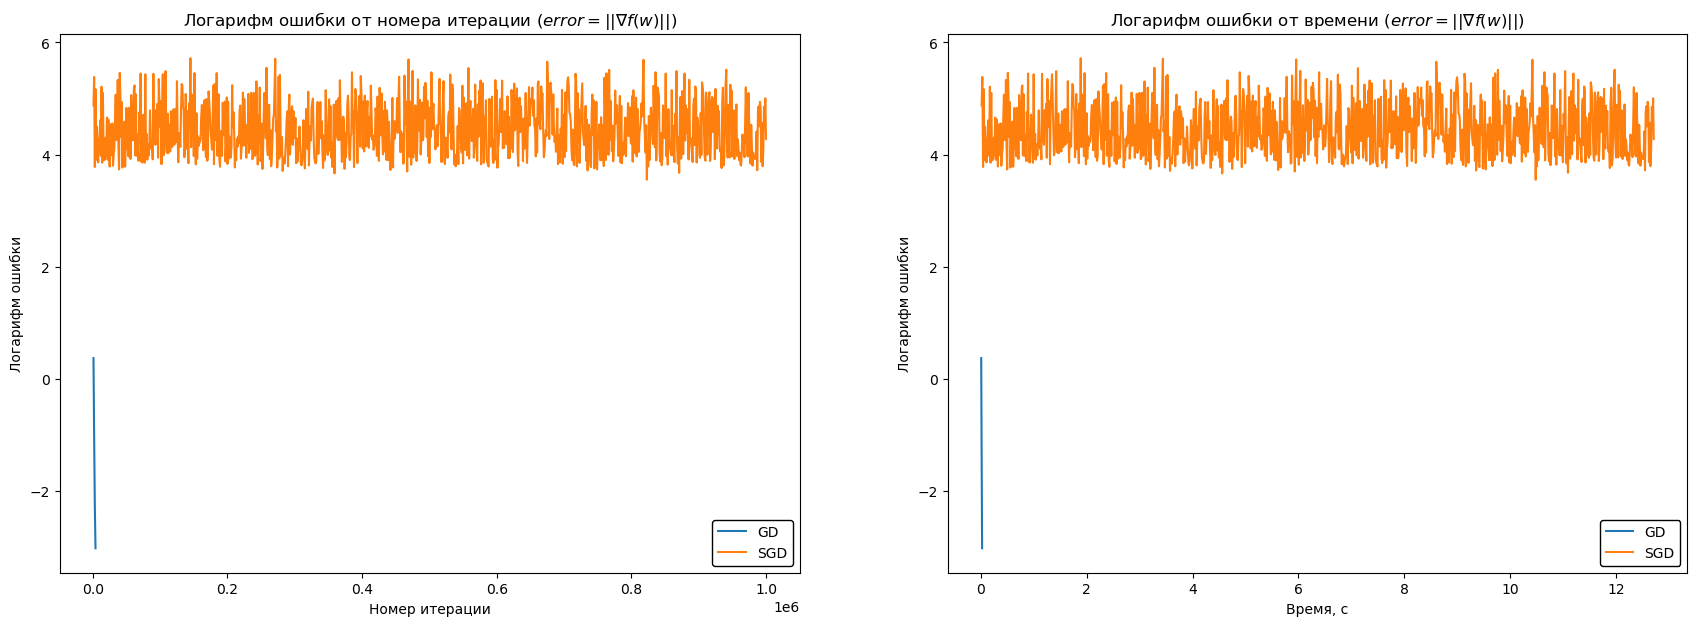

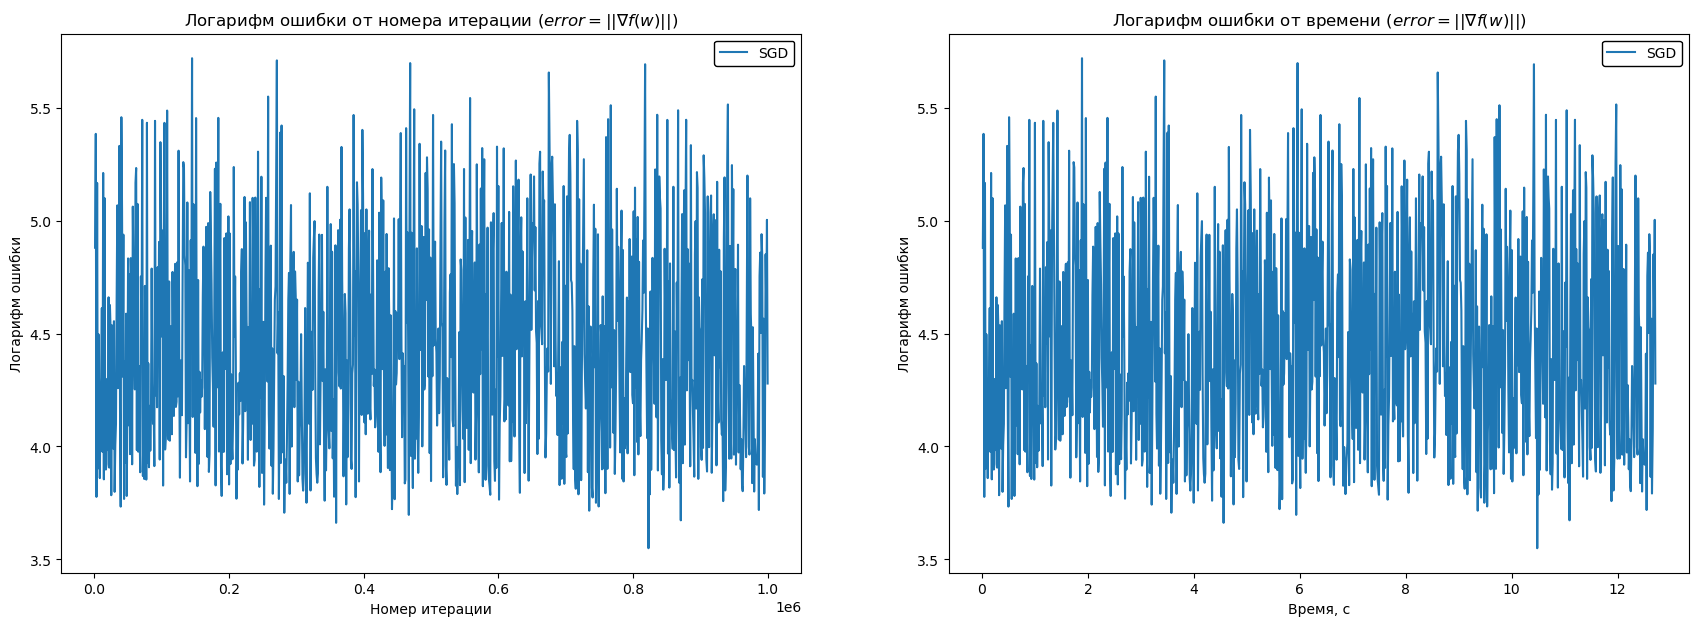

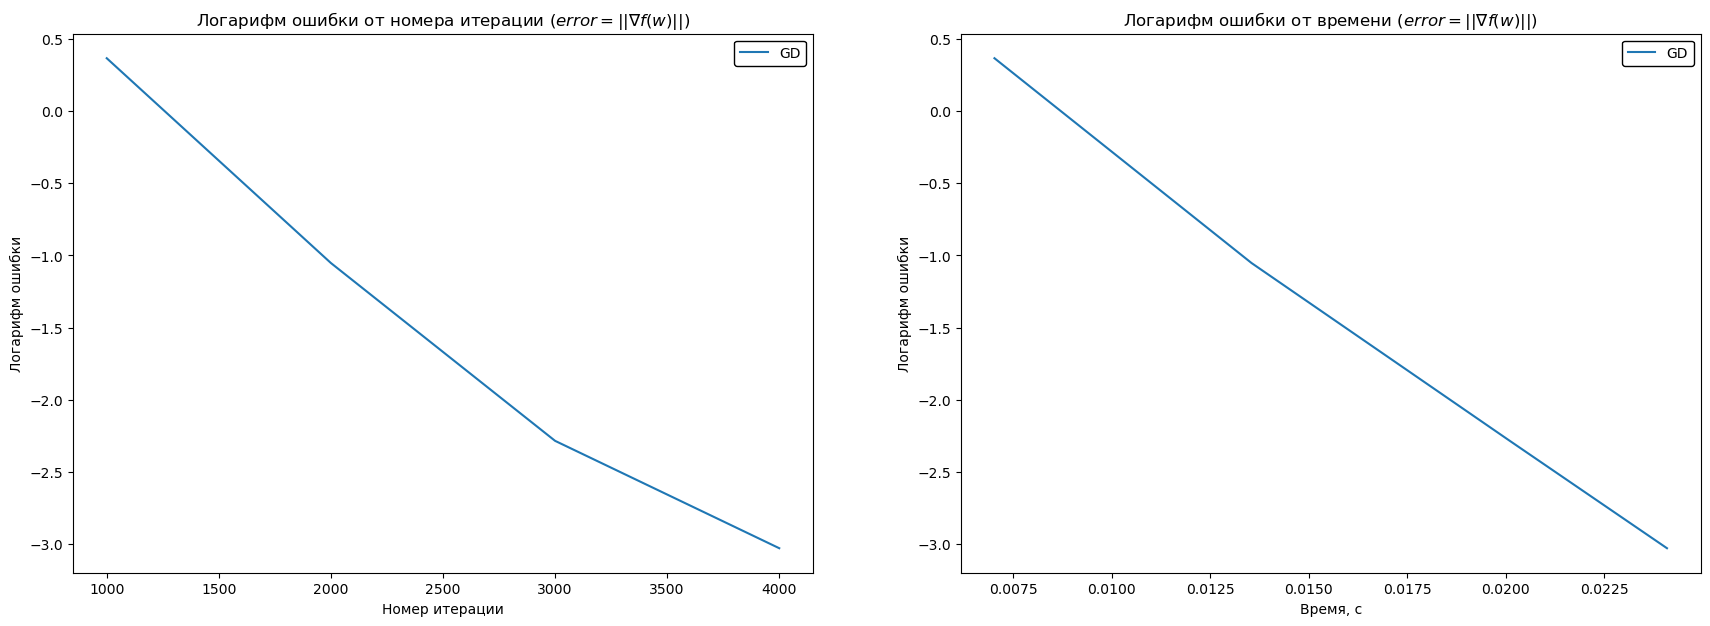

In [149]:
func_draw_error_time(model_dt, model_st)
draw_error_time(model_st)
draw_error_time(model_dt)

## Вывод:
Новый метод при таком выборе случайного вектора: $\xi^k$ - независимая от $x^k$ случайная величина из нормального распределения $\mathcal{N}(0, 100)$, не сходится, т.к. это вносит существенную погрешность в градиент функции и сходимости как такой нет, это видно из графика и того, как быстро сходится детерменированный градиентный спуск

__(б)__ На семинаре обсуждались способы борьбы со "стохастичностью" сходимости градиентного спуска. В частности, мы затронули использование уменьшающегося шага (смотри, например, Теорему 5 из [работы](https://arxiv.org/pdf/1907.04232.pdf)), а также использование батчирования (в нашем случае это просто замена: $\xi^k \to \frac{1}{b} \sum\limits_{i=1}^b \xi^k_i$, где $\xi^k_i \in \mathcal{N}(0, 100)$ и независимы). Реализуйте эти модификации (для батчирования возьмите $b = 10 , 100$). Добавьте полученные результаты на график сходимости из пункта (а). Постройте также график сходимости, где по оси $x$ будет не количество итераций, а количество генераций $\xi^k_i$ (количество вызовов стохастического градиента).

In [150]:
model_batch10 = MyLinearRegression(name="SGD + batch", batch=10)
model_batch10.fit(A, b)

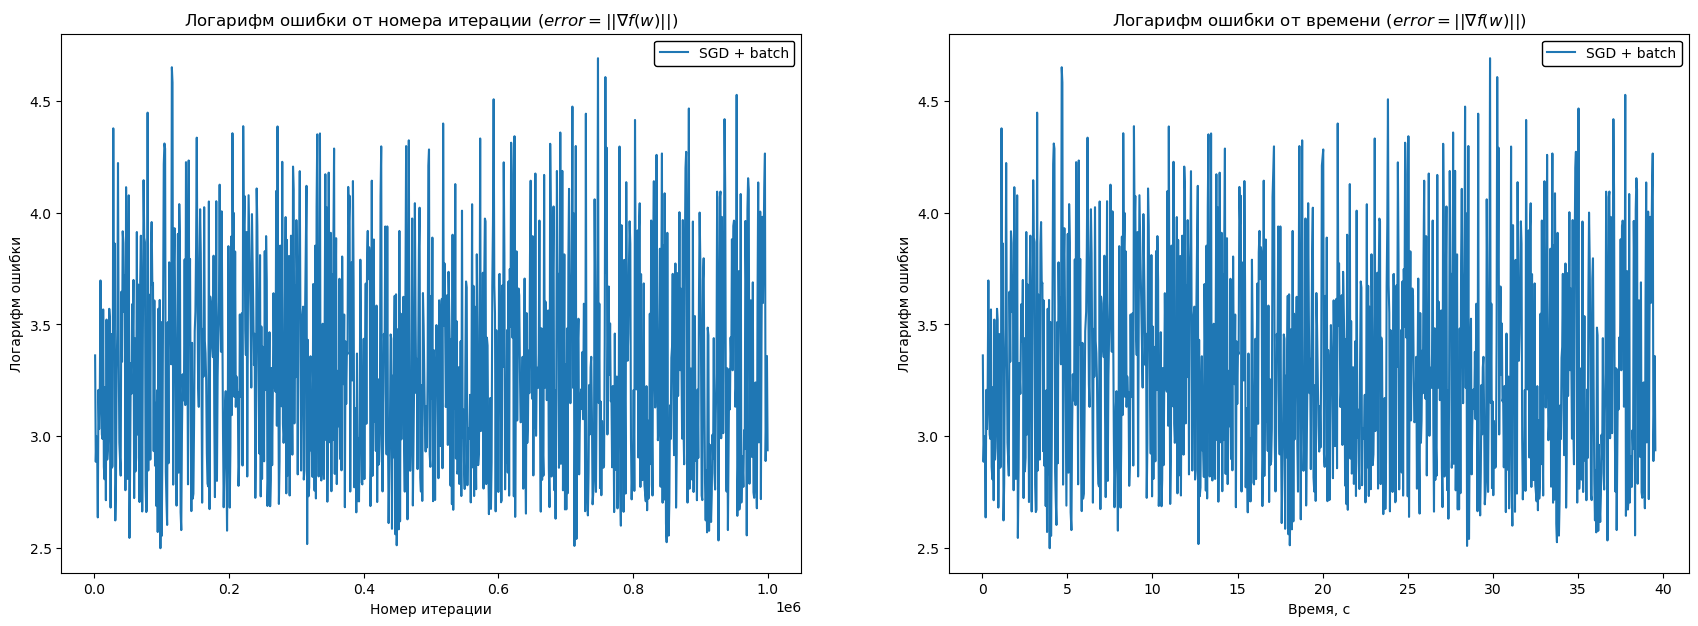

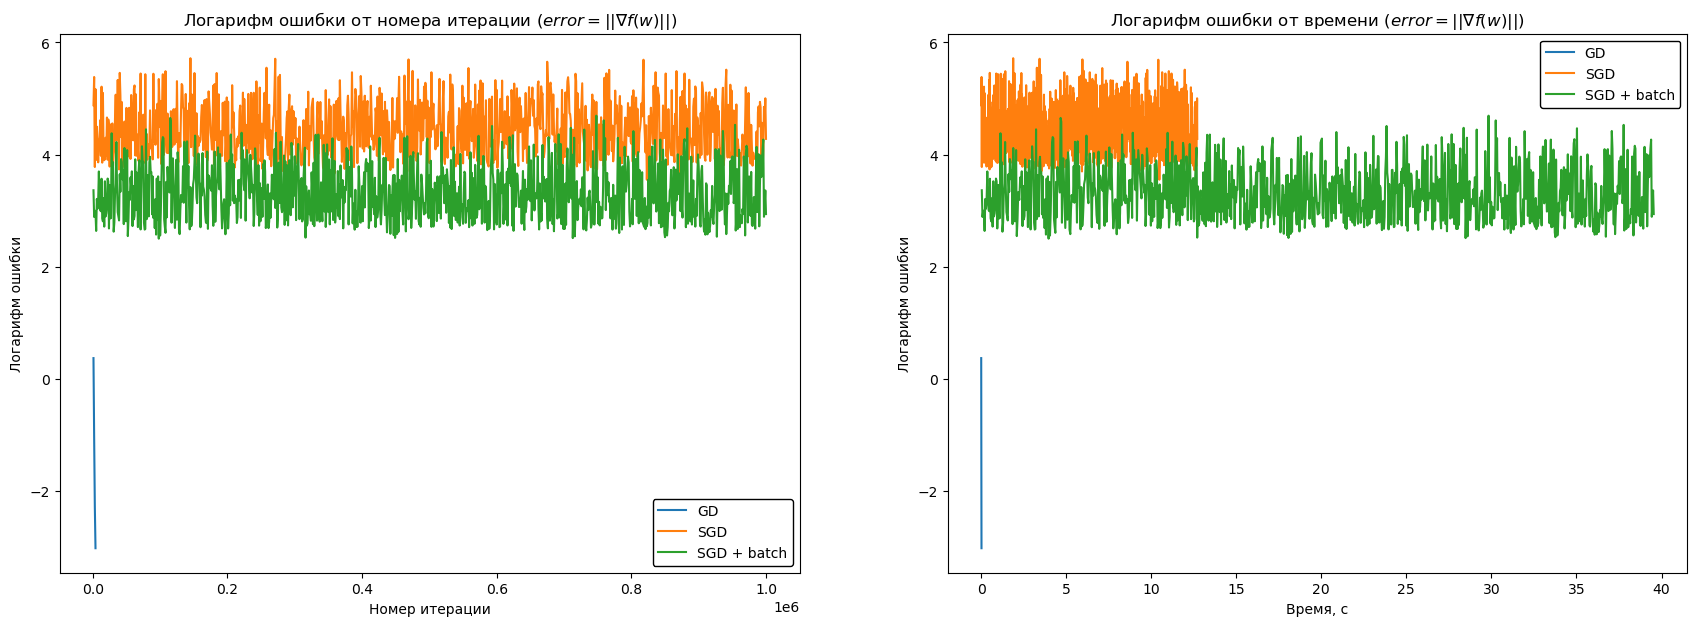

In [151]:
draw_error_time(model_batch10)
plot_3_models(model_dt, model_st, model_batch10)

In [152]:
model_batch100 = MyLinearRegression(name="SGD + batch", batch=100)
model_batch100.fit(A, b)

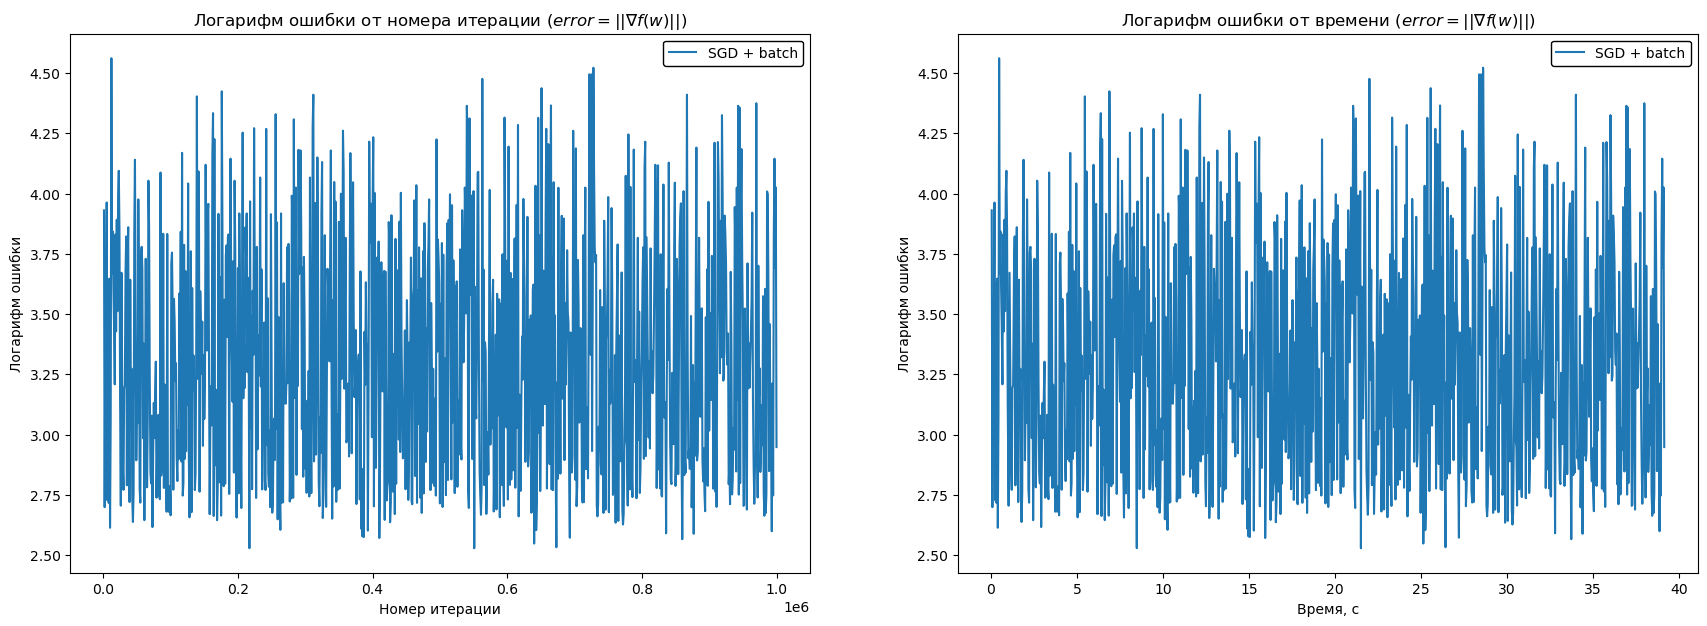

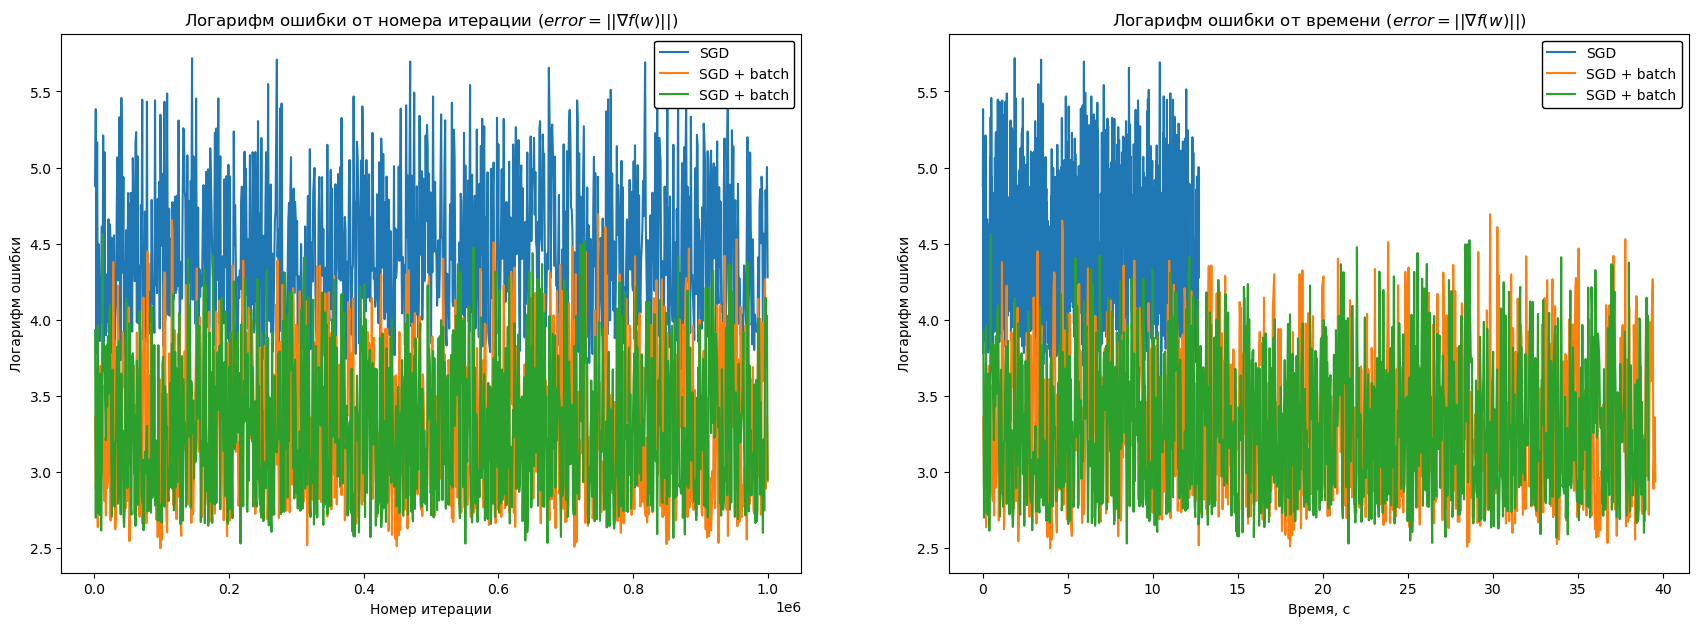

In [153]:
draw_error_time(model_batch100)
plot_3_models(model_st, model_batch10, model_batch100)

## Вывод:
Добавление батча улучшает сходимость данного метода, но размер батча (10 или 100) не влияет на его сходимость, заметное улучшение вносит уменьшение сигмы из нормального распределения, которому принадлежит случайная величина.

## Задача 2

Рассмотрим задачу логистической регрессии на датасете mushrooms с $\ell_2$-регуляризацией (коэффициент регуляризации равен $\frac{L}{1000}$). Как мы знаем, эта задача имеет вид конечной суммы:
\begin{equation}
\min_{w \in \mathbb{R}^d} f(w) := \frac{1}{N} \sum\limits_{j=1}^N f_j(w) := \frac{1}{n} \sum\limits_{j=1}^n \left[\frac{1}{b} \sum\limits_{i=1}^b f_{ji}(w)\right] := \frac{1}{n} \sum\limits_{j=1}^n \left[\frac{1}{b} \sum\limits_{i=1}^b l (g(w, x_i), y_i)\right],
\end{equation}
где $nb = N$ - полный размер выборки. Решите данную задачу с помощью SGD, SAGA (секция А.5 из [работы](https://arxiv.org/pdf/1905.11261.pdf)), SVRG (секция А.9 из [работы](https://arxiv.org/pdf/1905.11261.pdf)) и SARAH ([работа](https://arxiv.org/pdf/1703.00102.pdf)). 

__(а)__ Оцените $\mu$ и $L$ для данной задачи. Обратите внимание, что теория для SAGA, SVRG, SARAH предполагает, что $L$ - это константа Липшица градиентов $\nabla f_j$. 

Константу Липшица L градиентов мы можем оценить, как в 3-м задании, а именно, посчитаем $\nabla^2 f_i$:

$$
\nabla^2 f_i = \frac{x_i x_i^T}{(1 + \exp(y_i \cdot (w^Tx_i)))^2} \exp(y_i \cdot (w^T x_i))
$$

Тогда:
\begin{equation}
\nabla^2 f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{y_i^2 \cdot x_i x_i^T}{(1 + \exp(y_i \cdot (w^Tx_i)))^2} \exp(y_i \cdot (w^T x_i))
\end{equation}

Оценим L следующим образом, учитывая, что $\frac{\exp(x)}{(1+\exp(x))^2} \leq \frac{1}{4}$:
$$
L \geq \lambda_{max} \left( \frac{1}{4n} \sum\limits_{i=1}^n x_i x_i^T \right)
$$

Оценить $\mu$ же можно разве,что нулем, т.к. $\frac{\exp(x)}{(1+\exp(x))^2}$ нельзя оценить снизу ничем кроме нуля.
Или мы можем взять любое маленькое число C меньше, которого  $C \leq \frac{\exp(x)}{(1+\exp(x))^2}$ не может быть (это наше предположение) и оценить mu, как:
$$
\mu \leq \frac{C}{n}\cdot \lambda_{min}(\sum\limits_{i=1}^nx_i x_i^T)
$$


__(б)__ Реализуйте SGD, SAGA, SVRG, SARAH для задачи логистической регресии из $n$ слагаемых, где каждое слагаемое так же имеет виды суммы размеры $b$. Каким надо взять $b$? Почему? Что об этом говорит теория? Как будете выбирать шаг и другие параметры методов?

Шаг L лучше подбирать, следующим образом:
$$
L \geq \frac{b}{N} \lambda_{max}(\sum\limits_{i=1}^nx_i x_i^T)
$$

In [160]:
dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
print(X.shape, y.shape)
y = y*2 - 3
print(y)

(8124, 112) (8124,)
[-1.  1.  1. ...  1. -1.  1.]


In [154]:
l2_coef = 0.05
b = 100

__(в)__ Постройте графики сравнения всех методов: по оси $x$ используйте время или количество подсчетов $\nabla f_{ji}$, по оси $y$ - $\|\nabla f(w^k)\|$ или точность на тесте. Таким образом, всего 4 графика. Сделайте сравнение и вывод.

In [158]:
from importlib import reload
import HW_5
reload(HW_5)
from HW_5 import MyLogisticRegression

In [162]:
model_GD = MyLogisticRegression(l2=True, l2_coef= 0.05, name='gd', method='GD')
model_SGD = MyLogisticRegression(l2=True, l2_coef= 0.05, name='sgd', method='SGD')
model_SAGA = MyLogisticRegression(l2=True, l2_coef= 0.05, name='saga', method='SAGA')
model_SVRG = MyLogisticRegression(l2=True, l2_coef= 0.05, name='svrg', method='SVRG')
model_SARAH = MyLogisticRegression(l2=True, l2_coef= 0.05, name='sarah', method='SARAH')

__Бонусные пункты__

__(г)__ Методы SGD, SAGA, SVRG, SARAH, которые мы рассматривали, предполагают случайный выбор индекса на каждой итерации. Но между тем, на практике обычно делают по-другому и просто последовательно меняют $i_k$ от $1$ до $n$ (а потом заново). В [работе](https://arxiv.org/abs/2006.05988) изучаются такие подходы. Реализуйте Random Reshuffling и Shuffle Once для SGD и SARAH. Сравните новые алгоритмы со старыми версиями SGD и SARAH из пунктов (б) и (в).

In [156]:
#ответ

__(д)__ Методы SVRG и SARAH имеют loopless версии: L-SVRG (секция А.10 из [работы](https://arxiv.org/pdf/1905.11261.pdf) и PAGE ([работа](https://proceedings.mlr.press/v139/li21a.html)), соотвественно. Реализуйте их. Как будете выбирать вероятности в этих алгоритмах? Сравните новые алгоритмы со старыми версиями SVRG и SARAH из пунктов (б) и (в).

In [157]:
#ответ